# Making Transport Matrices Symmetric

After some issues with the compartmental models due to some towns having a net greater inflow than outflow or vice versa, we decided a good method of keeping all populations constant is to make there be no net inflow/outflow- that is make all adjacency matrices symmetric by taking their mean.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [9]:
# Read in the stochastic adjacency matrices
kl = sorted(os.listdir("/Volumes/HardDrive/New_Workflow/stochastic_44/"))
stoc = []
for item in kl:
    if '._' not in item:
        stoc.append(item)
        
d = {}
for i in range(len(stoc)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/stochastic_44/"+stoc[i], header = None)

In [10]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]

# When ignoring sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
                  (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
                 (waloc['City / Town'] != 'Two Rocks') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
                  (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
                 (waloc['City / Town'] != 'Dampier') ]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

# When also ignoring 0 flow towns
waloc = waloc.loc[(waloc['City / Town'] != 'Kununurra') & (waloc['City / Town'] != 'Derby') &
                  (waloc['City / Town'] != 'Boddington-Ranford') & (waloc['City / Town'] != 'Wyndham')]
waloc = waloc.reset_index()
waloc = waloc.drop(columns = ['index'])

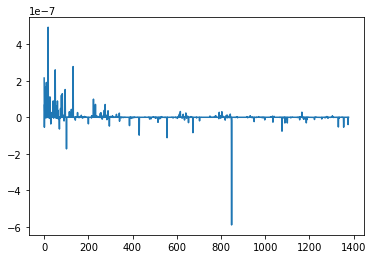

In [11]:
df = d[str(0)].copy()
listform = df.to_numpy().tolist()
diff = []
for i in range(len(listform)):
    for j in range(i+1,len(listform[0])):
        diff.append(listform[i][j]- listform[j][i])
plt.plot(diff)

In [12]:
new_df = []
for i in range(len(listform)):
    new = []
    for j in range(len(listform[i])):
        new.append((listform[i][j]+ listform[j][i])/2)
    new_df.append(new)

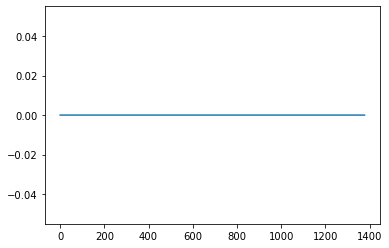

In [13]:
diff = []
listform = new_df
for i in range(len(listform)):
    for j in range(i+1,len(listform[0])):
        diff.append(listform[i][j]- listform[j][i])
plt.plot(diff)

Great, it works! Now write it into a function.

In [14]:
def even_it_out(df):
    
    listform = df.to_numpy().tolist()
    
    new_df = []
    for i in range(len(listform)):
        new = []
        for j in range(len(listform[i])):
            new.append((listform[i][j]+ listform[j][i])/2)
        new_df.append(new)
    
    return pd.DataFrame(new_df)

In [15]:
for i in range(len(stoc)):
    dp = pd.read_csv("/Volumes/HardDrive/New_Workflow/stochastic_44/"+stoc[i], header = None)
    
    df = dp.copy()
    
    new_df = even_it_out(df)
    
    new_df.to_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_44/"+stoc[i],index = False, header = False)

Had another problem - sometimes the flow is too great that there are more people outgoing/incoming than the population of the town...
For now just write it to max out at one of the town's populations

In [4]:
d = {}
for i in range(len(stoc)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_48/"+stoc[i], header = None)

In [5]:
d['lvl_2'] = pd.read_csv("/Volumes/HardDrive/New_Workflow/restrictions/level_2.csv", header = None)

In [9]:
popn = list(waloc['Population'])

In [10]:
C = 9*10**9

In [11]:
llist = []
df = d['lvl_2'].copy()*C/7
listform = df.to_numpy().tolist()
for i in range(len(listform)):
    if sum(listform[i]) > popn[i]:
        if i in llist:
            continue
        else:
            print(sum(listform[i]), popn[i],i)
            llist.append(i)

50303.808483850706 25329 5
25003.83589846953 15828 6
17330.943904216463 13828 8
9650.882199105452 7192 10
10493.277267028749 6548 11
32803.607389054894 6039 13
23163.164777180486 4567 14
4706.242131722626 4213 18
15031.22636989351 2956 21
3166.877847563646 2782 22
6571.366635295169 2750 23
8332.387682257711 2558 25
6112.405260681181 2548 26
16237.534777579303 2520 27
15768.842268523373 2020 30
3046.9255418475286 1905 31
3118.345332532048 1789 32
10806.072592266766 1703 33
7931.9826998573135 1572 35
12143.58634576476 1546 36
1444.5902162324128 1425 38
13364.198174684776 1359 39
2668.160580888525 1165 42
271816.4754263902 80813 46


In [12]:
llist = []
for week in range(len(d)):
    df = d[str(week)].copy()*C/7
    listform = df.to_numpy().tolist()
    for i in range(len(listform)):
        if sum(listform[i]) > popn[i]:
            if i in llist:
                continue
            else:
                print(sum(listform[i]), popn[i],i)
                llist.append(i)

In [13]:
llist

[]

In [101]:
for i in llist:
    print(waloc.iloc[i][0])

Pinjarra
Drummond Cove
Dampier
Bridgetown
Binningup


In [81]:
waloc

,City / Town,Population,long,latt
0,Perth,1874578,115.860500,-31.9505
1,Bunbury,71090,115.639600,-33.3256
2,Geraldton,31982,114.614400,-28.7797
3,Kalgoorlie-Boulder,29875,121.466000,-30.7490
4,Albany,29373,117.883700,-35.0269
5,Busselton,25329,115.345500,-33.6532
6,Karratha,15828,116.845800,-20.7353
7,Broome,13984,122.230400,-17.9644
8,Port Hedland,13828,118.486400,-20.9818
9,Esperance,10421,121.992800,-33.4866


In [75]:
df = d['70'].copy()*C/7

listform = df.to_numpy().tolist()
for i in range(len(listform)):
    for j in range(len(listform[0])):
        if listform[i][j] > popn[i]:
            print(listform[i][j], popn[i])
            listform[i][j] = popn[i]

In [76]:
for i in range(len(listform)):
    for j in range(len(listform[0])):
        if listform[i][j] > popn[i]:
            print(listform[i][j], popn[i])
            listform[i][j] = popn[i]

Great, it works, now write it into a function.

In [83]:
def max_it_out(df):
    
    dp = df.copy()*C/7
    
    counter = 0
    listform = dp.to_numpy().tolist()
    for i in range(len(listform)):
        for j in range(len(listform[0])):
            if listform[i][j] > popn[i]:
                counter += 1 # Keep count of how often this happens
                listform[i][j] = (popn[i]-1)*7/C
                listform[j][i] = (popn[i]-1)*7/C
            else:
                listform[i][j] = listform[i][j]*7/C
    
    return pd.DataFrame(listform), counter

In [84]:
problems = []
for i in range(len(stoc)):
    dp = pd.read_csv("/Volumes/HardDrive/New_Workflow/stochastic_53/"+stoc[i], header = None)
    
    df = dp.copy()
    
    new_df = even_it_out(df)
    
    newer_df, co = max_it_out(new_df)
    
    problems.append(co)
    
    newer_df.to_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_53/"+stoc[i],index = False, header = False)

In [85]:
np.average(problems)

1.7525773195876289

In [86]:
d = {}
for i in range(len(stoc)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/symm_stoc_53/"+stoc[i], header = None)

d['70'][31][2].copy()*C/7

2051.0

In [82]:
d['70'][31][2]

-0.999998404